In [1]:
import numpy as np
import pandas as pd
from imblearn.combine import SPIDER

In [2]:
def sort_results(X, y=None):
    if y is None:
        Xy = X
    else:
        Xy = np.hstack([X, y[:, np.newaxis]])
    sort_idx = np.argsort(Xy[:, 0])
    df = pd.DataFrame(Xy[sort_idx], columns=['x', 'y', 'Class'])
    df['Class'] = df['Class'].astype(int)
    return df

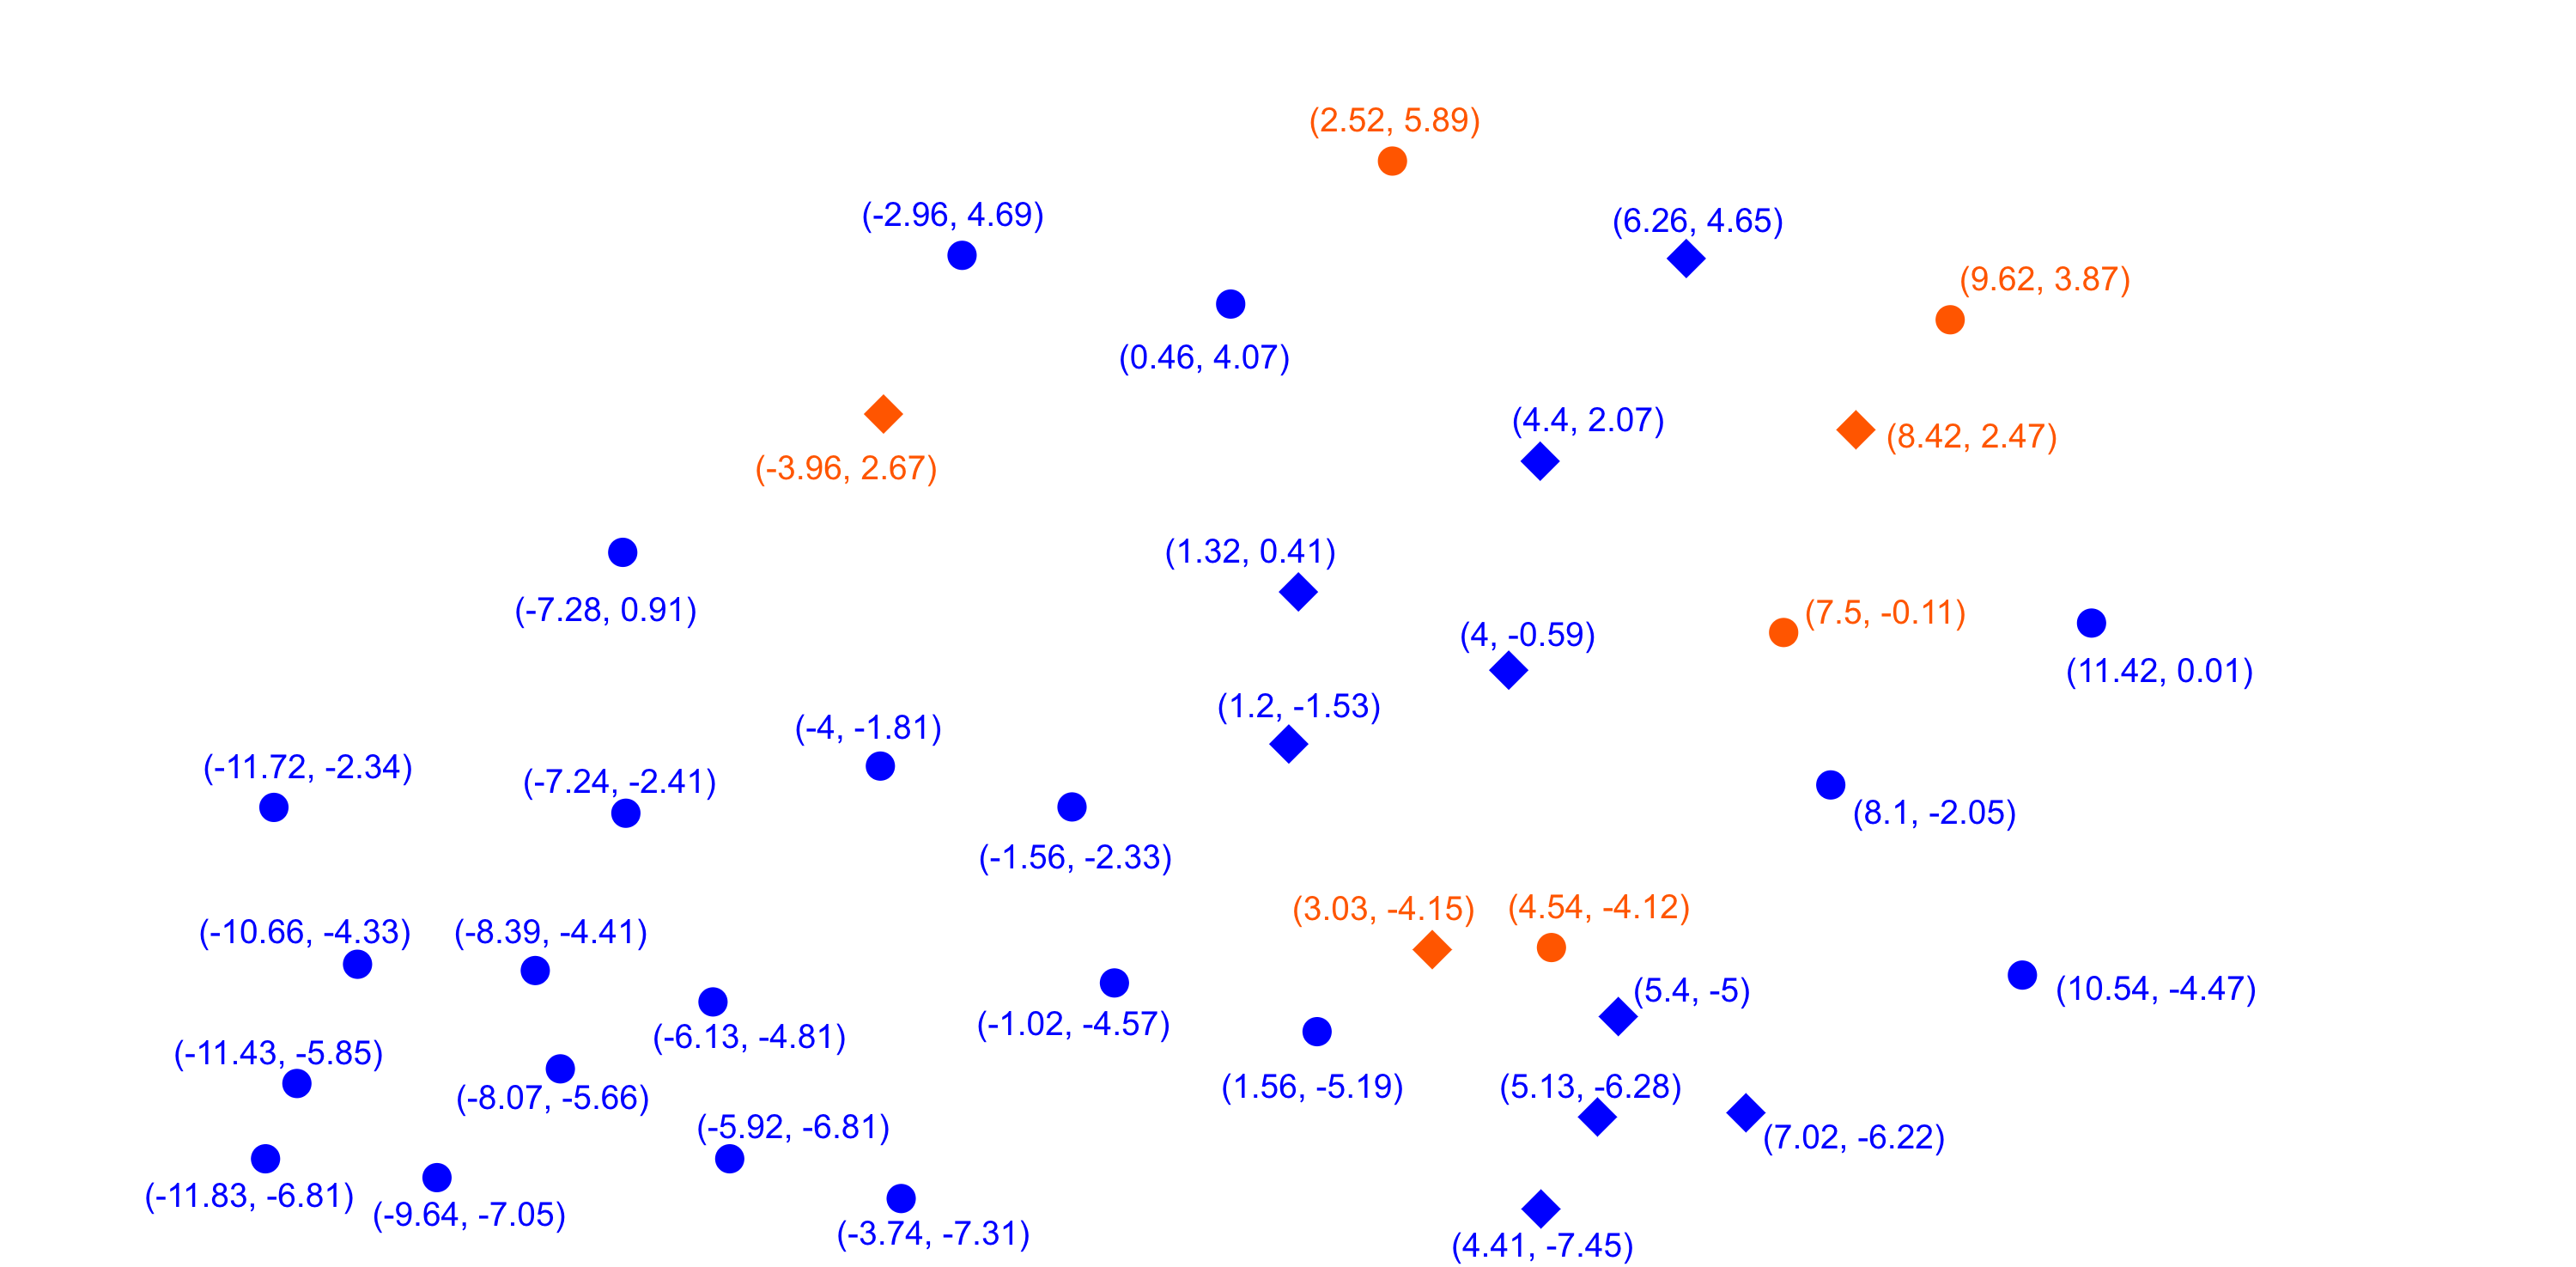

In [3]:
Xy = np.array([
    [-11.83, -6.81, 0],
    [-11.72, -2.34, 0],
    [-11.43, -5.85, 0],
    [-10.66, -4.33, 0],
    [ -9.64, -7.05, 0],
    [ -8.39, -4.41, 0],
    [ -8.07, -5.66, 0],
    [ -7.28,  0.91, 0],
    [ -7.24, -2.41, 0],
    [ -6.13, -4.81, 0],
    [ -5.92, -6.81, 0],
    [ -4.  , -1.81, 0],
    [ -3.96,  2.67, 1], # noisy
    [ -3.74, -7.31, 0],
    [ -2.96,  4.69, 0],
    [ -1.56, -2.33, 0],
    [ -1.02, -4.57, 0],
    [  0.46,  4.07, 0],
    [  1.2 , -1.53, 1],
    [  1.32,  0.41, 1],
    [  1.56, -5.19, 0],
    [  2.52,  5.89, 0], # noisy
    [  3.03, -4.15, 1], # noisy
    [  4.  , -0.59, 1],
    [  4.4 ,  2.07, 1],
    [  4.41, -7.45, 1],
    [  4.45, -4.12, 0], # noisy
    [  5.13, -6.28, 1],
    [  5.4 , -5   , 1],
    [  6.26,  4.65, 1],
    [  7.02, -6.22, 1],
    [  7.5 , -0.11, 0], # noisy
    [  8.1 , -2.05, 0],
    [  8.42,  2.47, 1], # noisy
    [  9.62,  3.87, 0], # noisy
    [ 10.54, -4.47, 0],
    [ 11.42,  0.01, 0],
])

df = pd.DataFrame(Xy, columns=['x', 'y', 'Class'])
df['Class'] = df['Class'].astype(int)
X = df.drop(columns='Class')
y = df['Class']
# df

## Weak

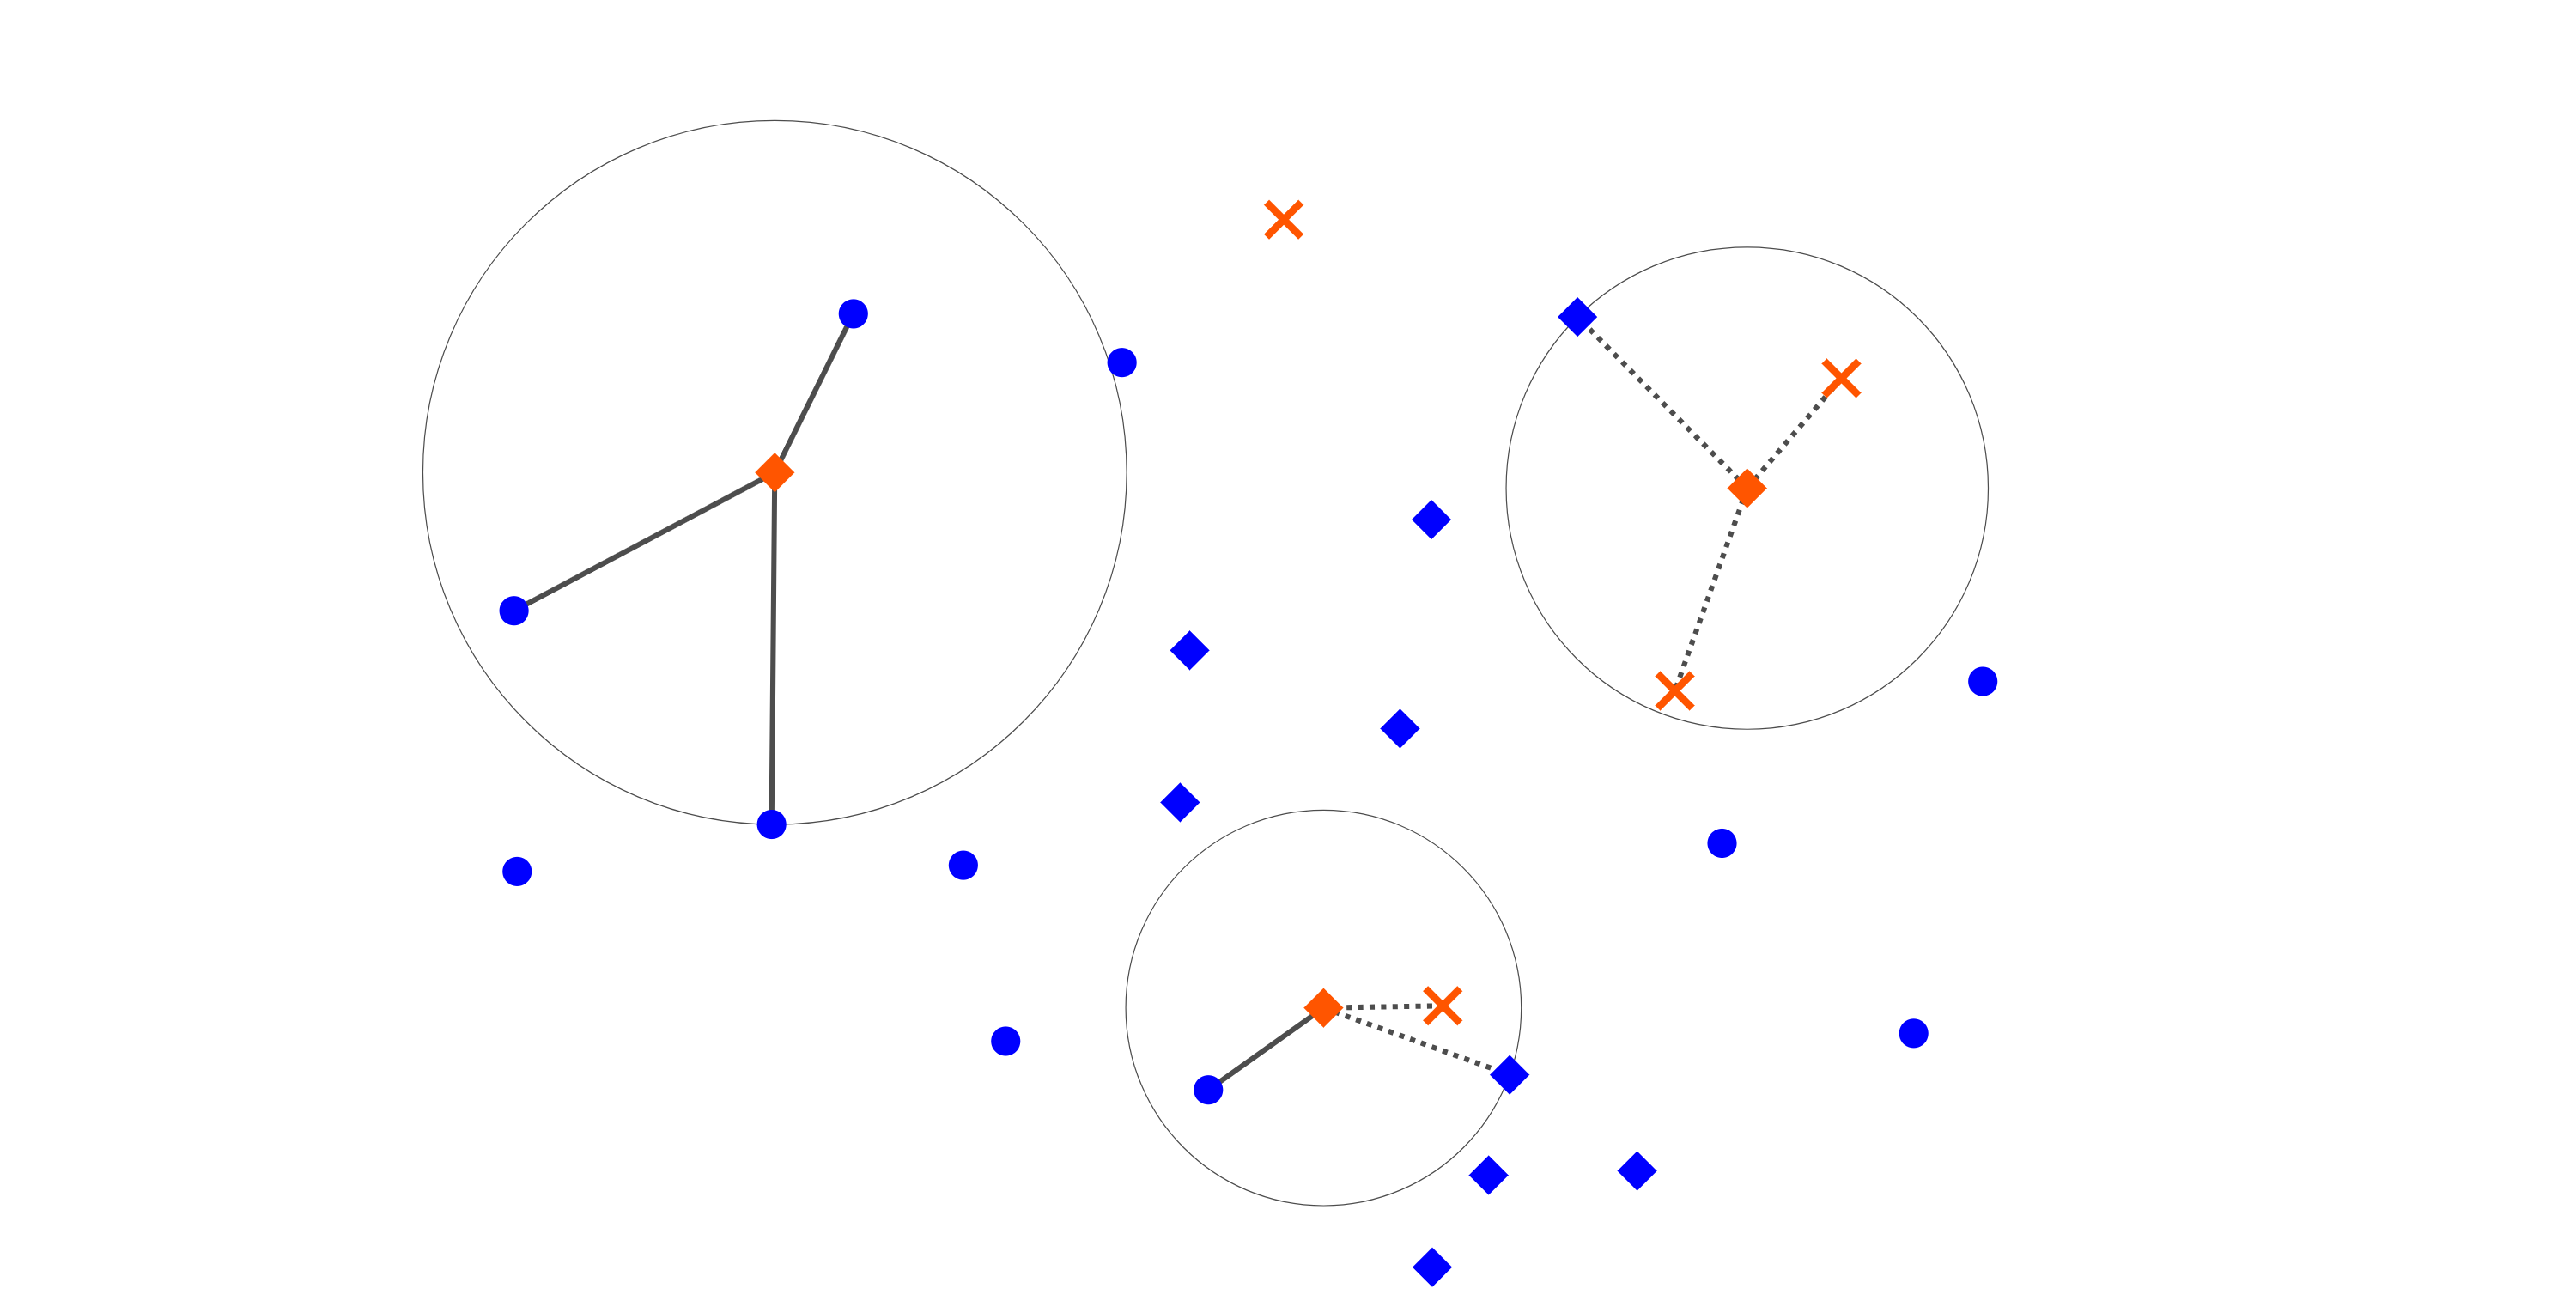

In [4]:
amp1 = np.vstack([[ -3.96,  2.67, 1]] * 3)
amp2 = np.vstack([[  3.03, -4.15, 1]] * 1)
# amp3 = np.array([[  8.42,  2.47, 1]] * 0)
amplify = np.vstack([amp1, amp2])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_weak = np.vstack([Xy[~mask], amplify])
df_expected_weak = sort_results(Xy_expected_weak)

In [5]:
weak = SPIDER(kind='weak')
X_weak, y_weak = weak.fit_resample(X, y)
df_weak = sort_results(X_weak, y_weak)
np.all(df_weak == df_expected_weak)

True

## Relabel

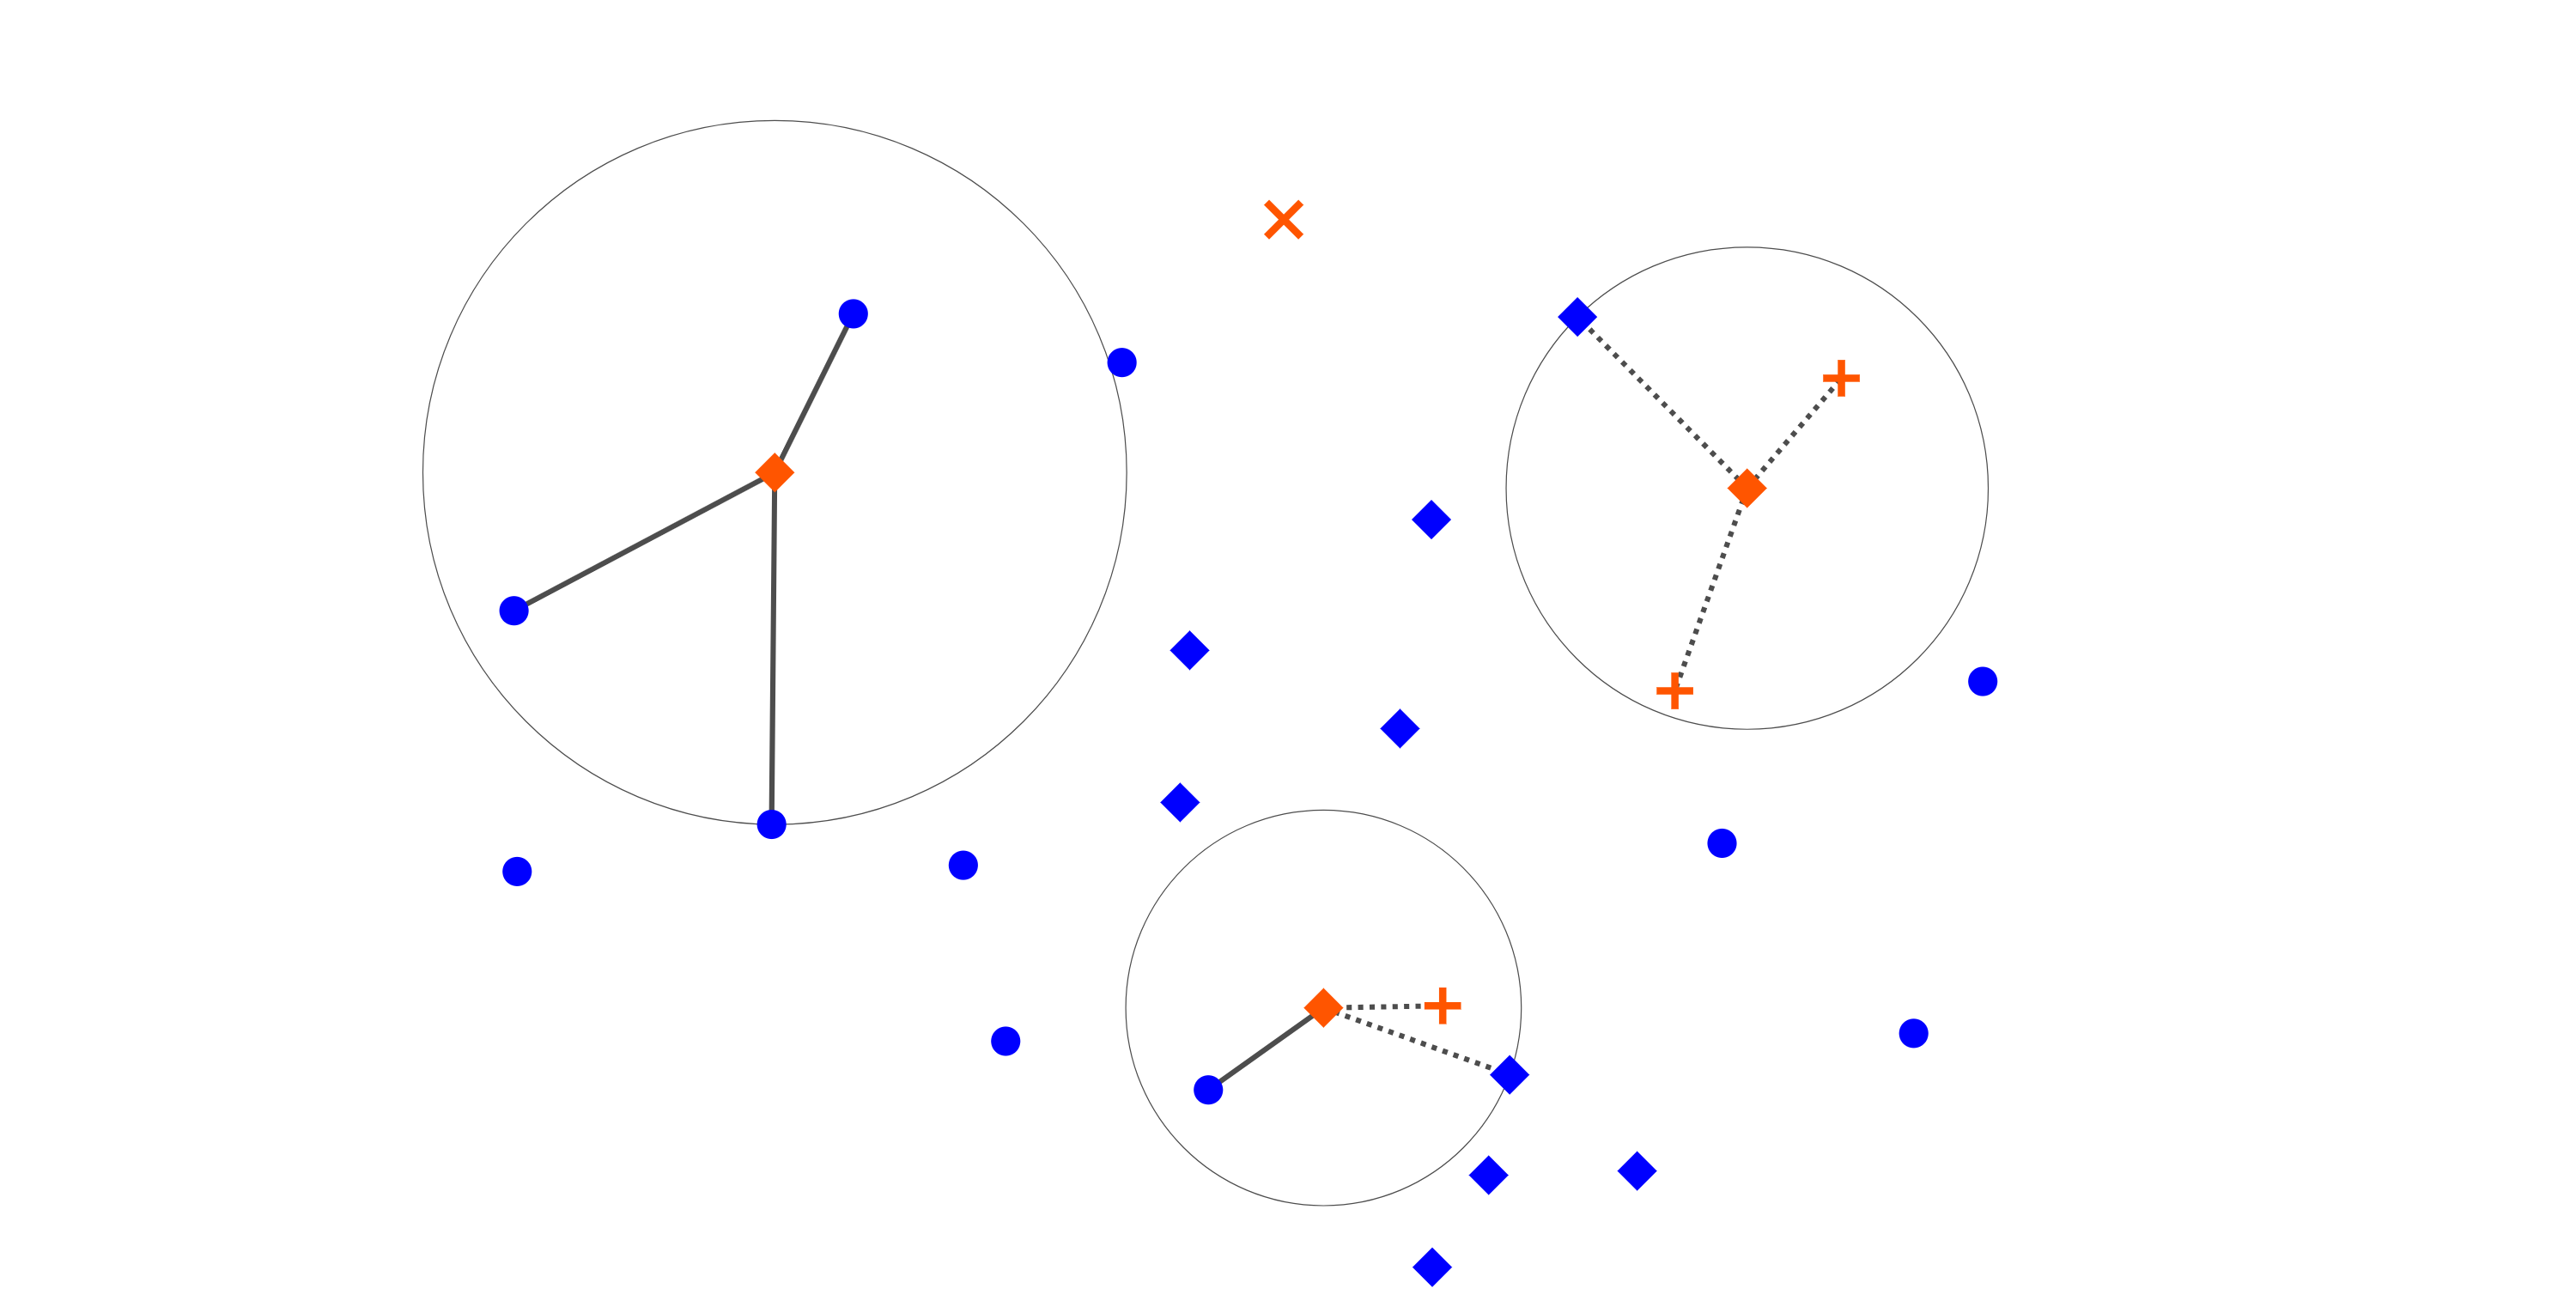

In [6]:
amp1 = np.vstack([[ -3.96,  2.67, 1]] * 3)
amp2 = np.vstack([[  3.03, -4.15, 1]] * 1)
# amp3 = np.vstack([[  8.42,  2.47, 1]] * 0)
amplify = np.vstack([amp1, amp2])

relabel = np.array([
    [  4.45, -4.12, 1],
    [  7.5 , -0.11, 1],
    [  9.62,  3.87, 1]
])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_relabel = np.vstack([Xy[~mask], amplify, relabel])
df_expected_relabel = sort_results(Xy_expected_relabel)

In [7]:
relabel = SPIDER(kind='relabel')
X_relabel, y_relabel = relabel.fit_resample(X, y)
df_relabel = sort_results(X_relabel, y_relabel)
np.all(df_relabel == df_expected_relabel)

True

## Strong

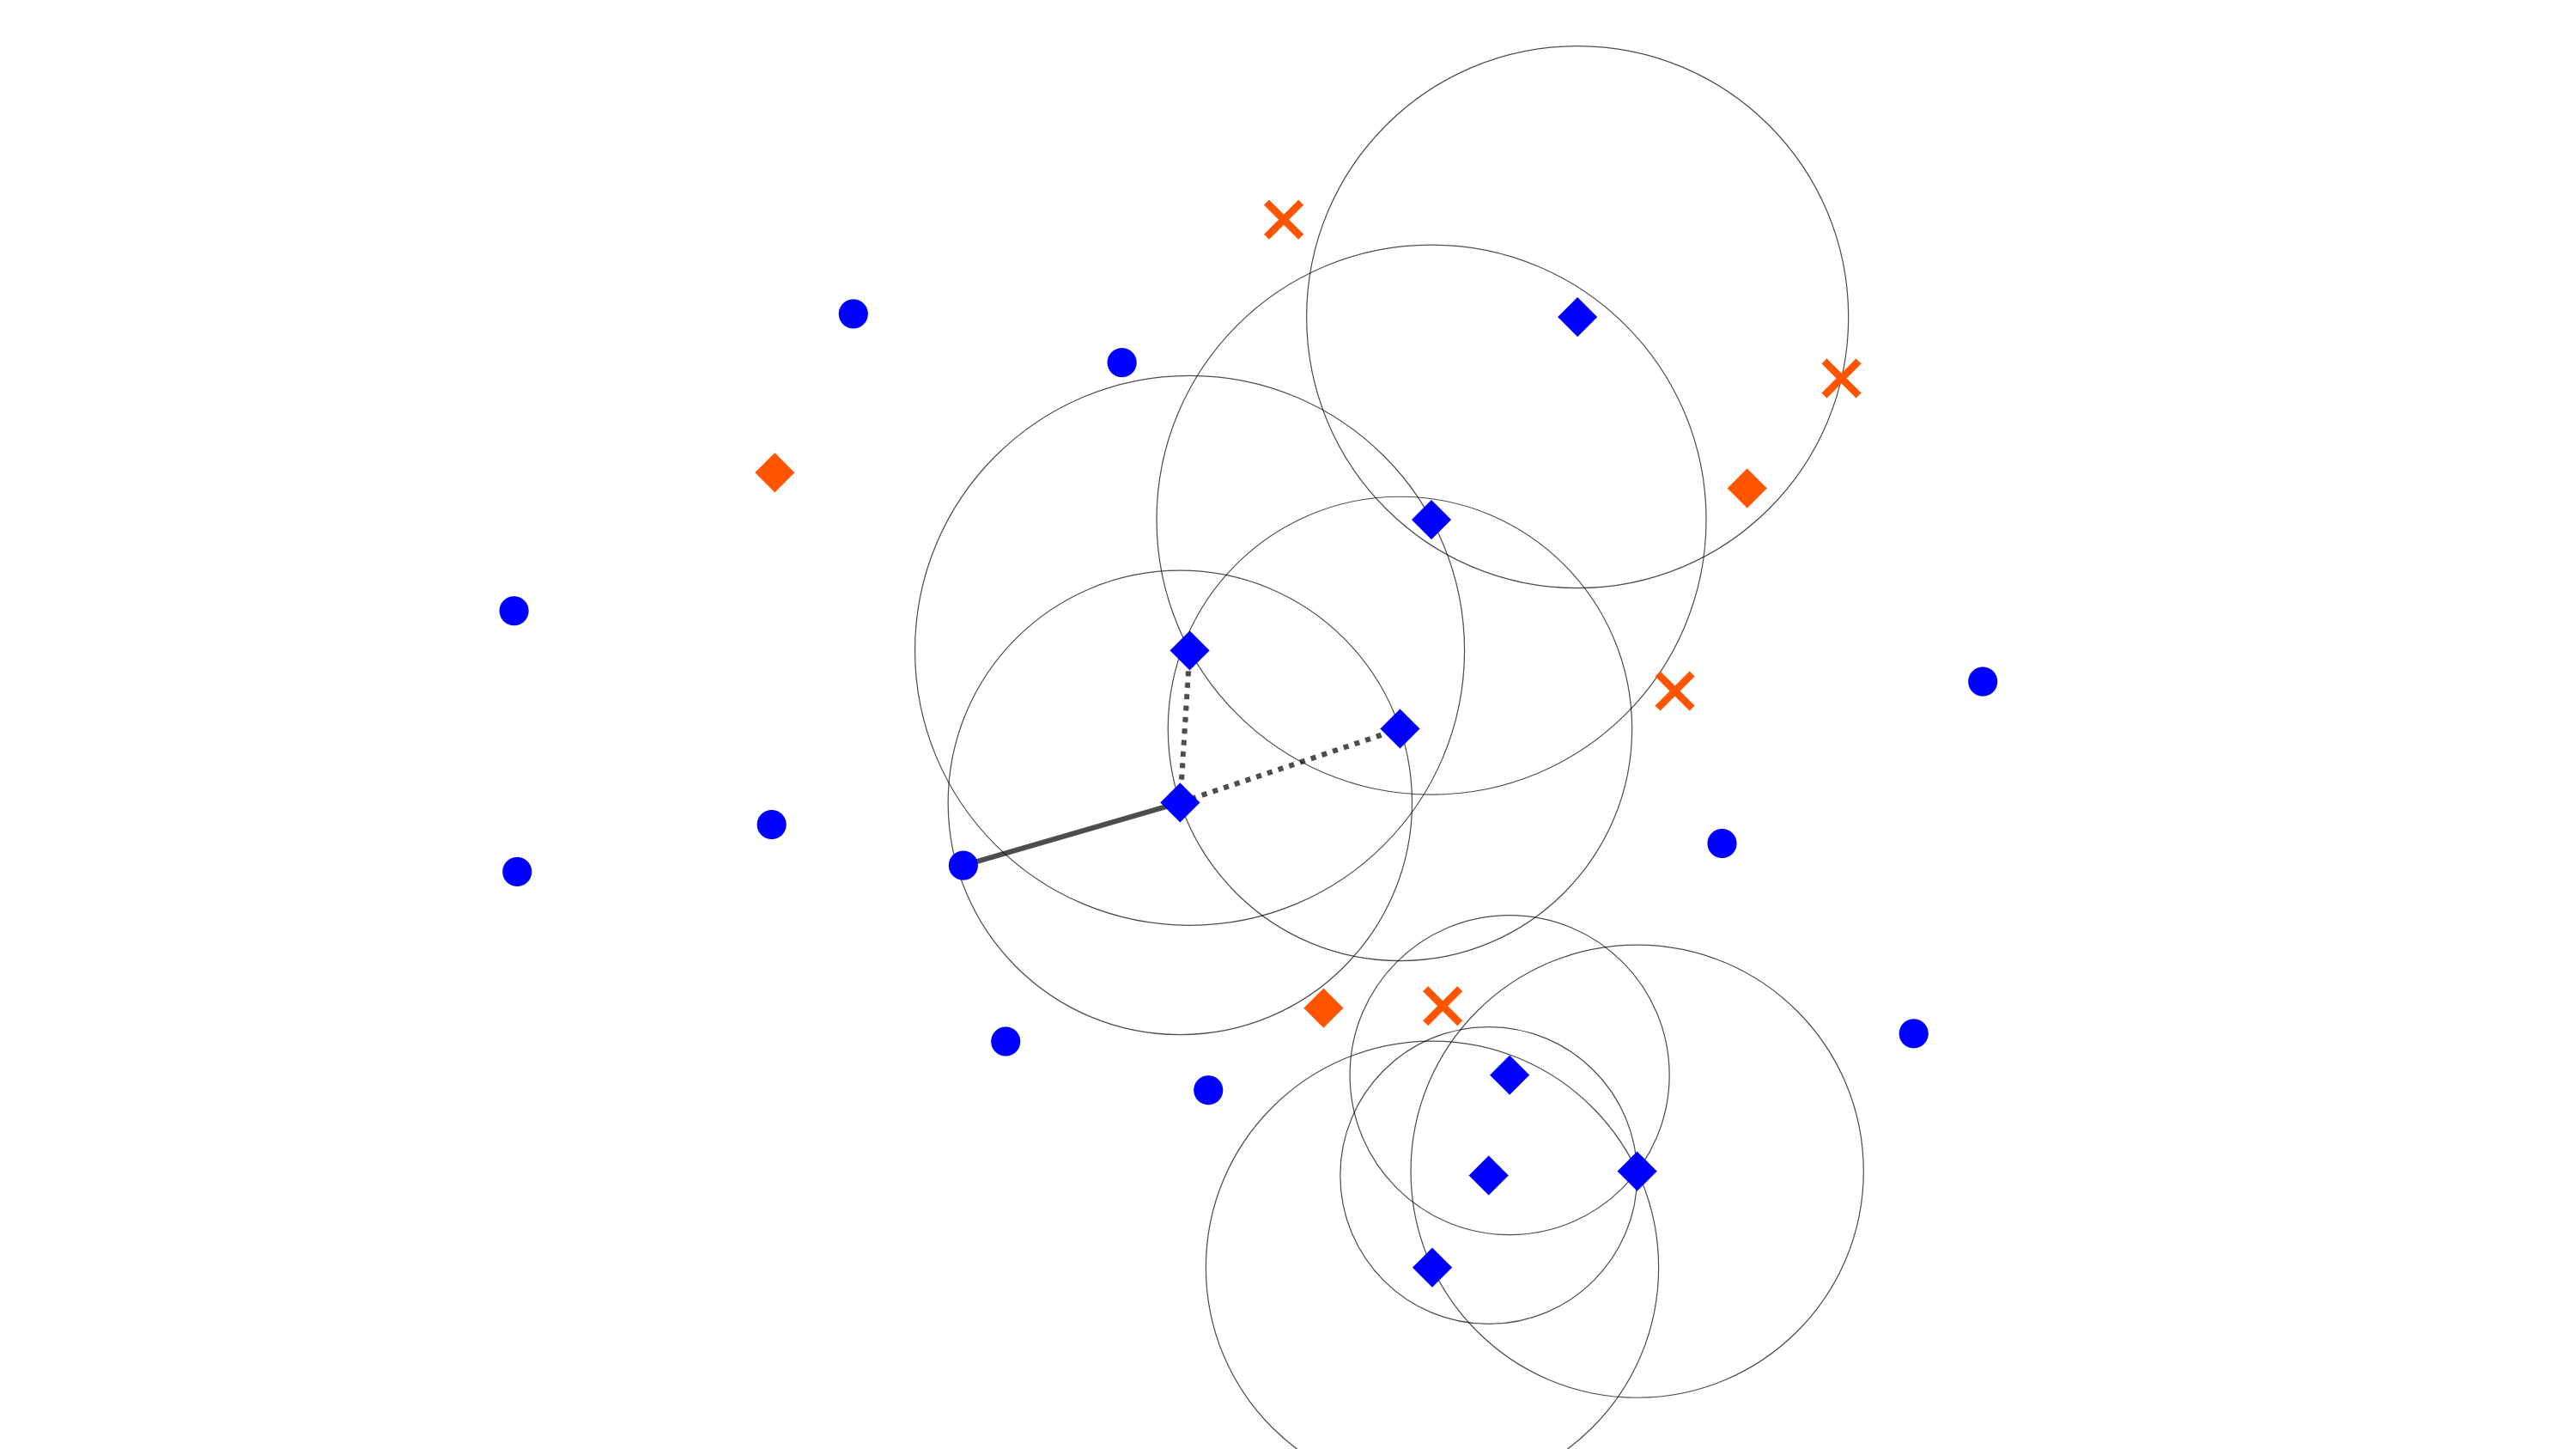

In [8]:
amp_safe_1 = np.vstack([[  1.2 , -1.53, 1]] * 1)

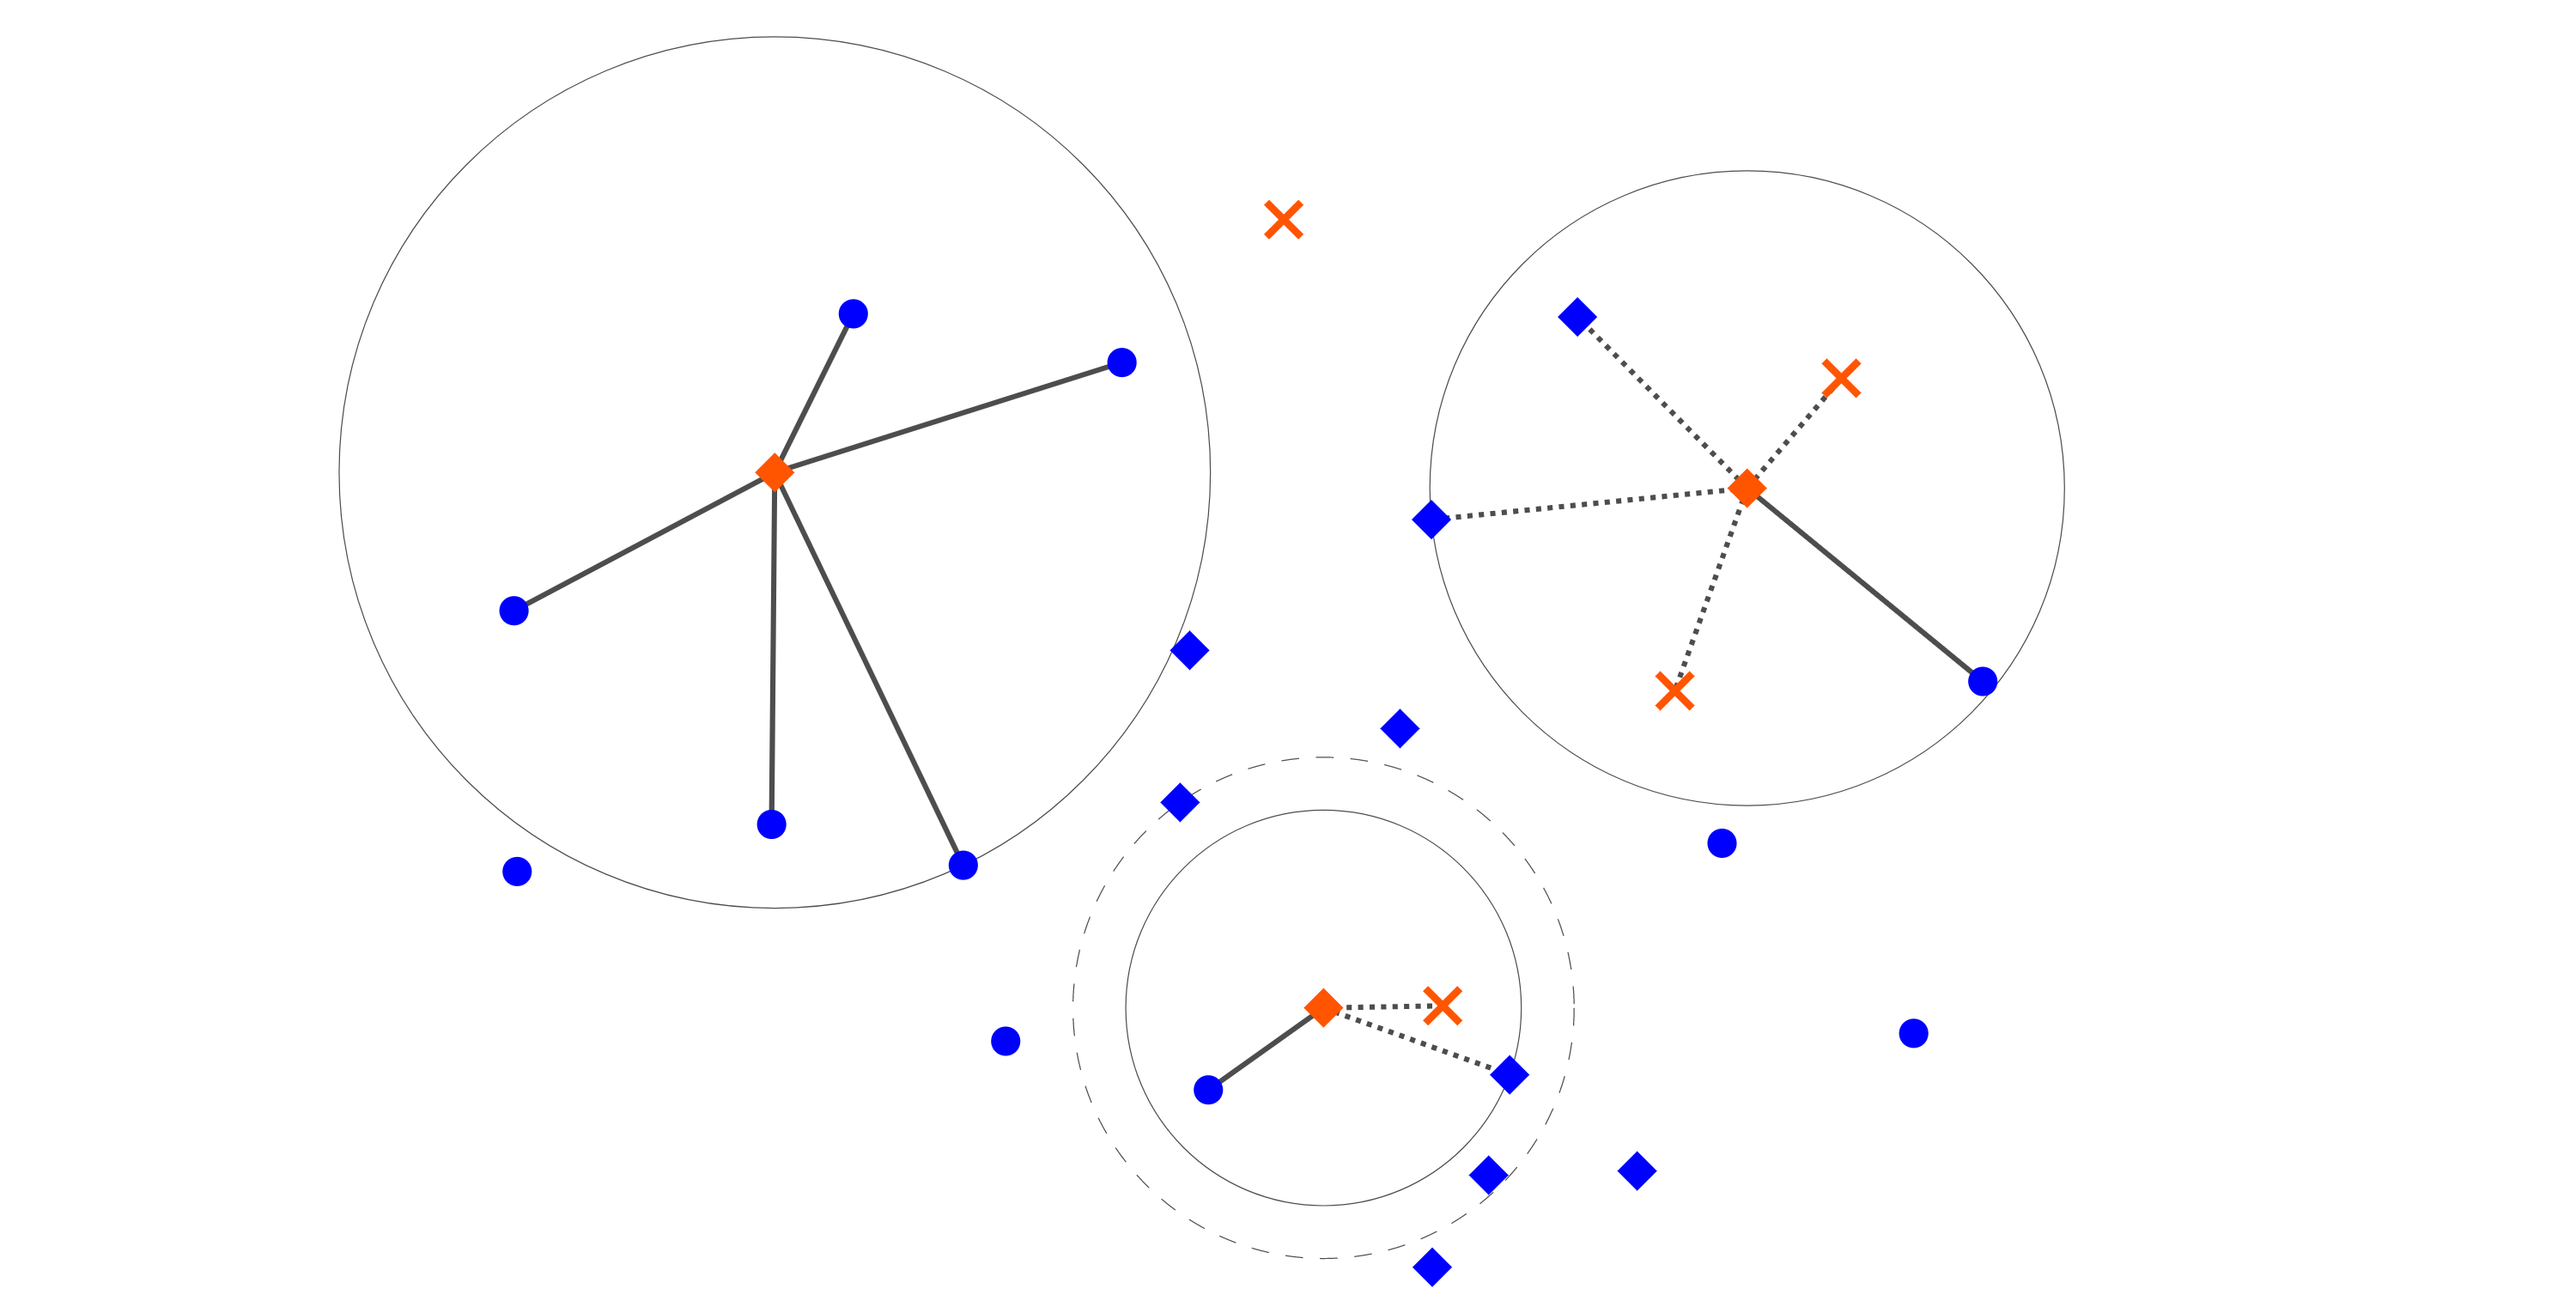

In [9]:
amp_noise_1 = np.vstack([[ -3.96,  2.67, 1]] * 5)
amp_noise_2 = np.vstack([[  3.03, -4.15, 1]] * 1)
amp_noise_3 = np.vstack([[  8.42,  2.47, 1]] * 1)
amplify = np.vstack([amp_safe_1, amp_noise_1, amp_noise_2, amp_noise_3])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_strong = np.vstack([Xy[~mask], amplify])
df_expected_strong = sort_results(Xy_expected_strong)

In [13]:
strong = SPIDER(kind='strong')
X_strong, y_strong = strong.fit_resample(X, y)
df_strong = sort_results(X_strong, y_strong)
np.all(df_strong == df_expected_strong)

True

In [24]:
np.set_printoptions(precision=2, suppress=True)
y_strong

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])